In [2]:
import pandas as pd
import numpy as np

In [3]:
# Caminho para o arquivo CSV
file_path = 'mushrooms_data/agaricus-lepiota.data'

# Lista com os nomes das colunas, conforme a descrição do dataset
columns = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
    'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
    'ring-type', 'spore-print-color', 'population', 'habitat'
]

# Leitura do arquivo
df = pd.read_csv(file_path, header=None, names=columns)

# Configurar o pandas para mostrar todas as colunas
pd.set_option('display.max_columns', None)

# Exibir as primeiras 10 linhas com todas as colunas
display(df.head(10))

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m


In [4]:
print(f"Número de linhas no dataset: {len(df)}")


Número de linhas no dataset: 8124


In [5]:
# Verificar valores ausentes representados por '?' em todas as colunas
missing_values = (df == '?').sum()

# Filtrar apenas as colunas que possuem valores ausentes
missing_values = missing_values[missing_values > 0]

# Exibir resultado
print("Valores ausentes (representados por '?') por coluna:")
print(missing_values)


Valores ausentes (representados por '?') por coluna:
stalk-root    2480
dtype: int64


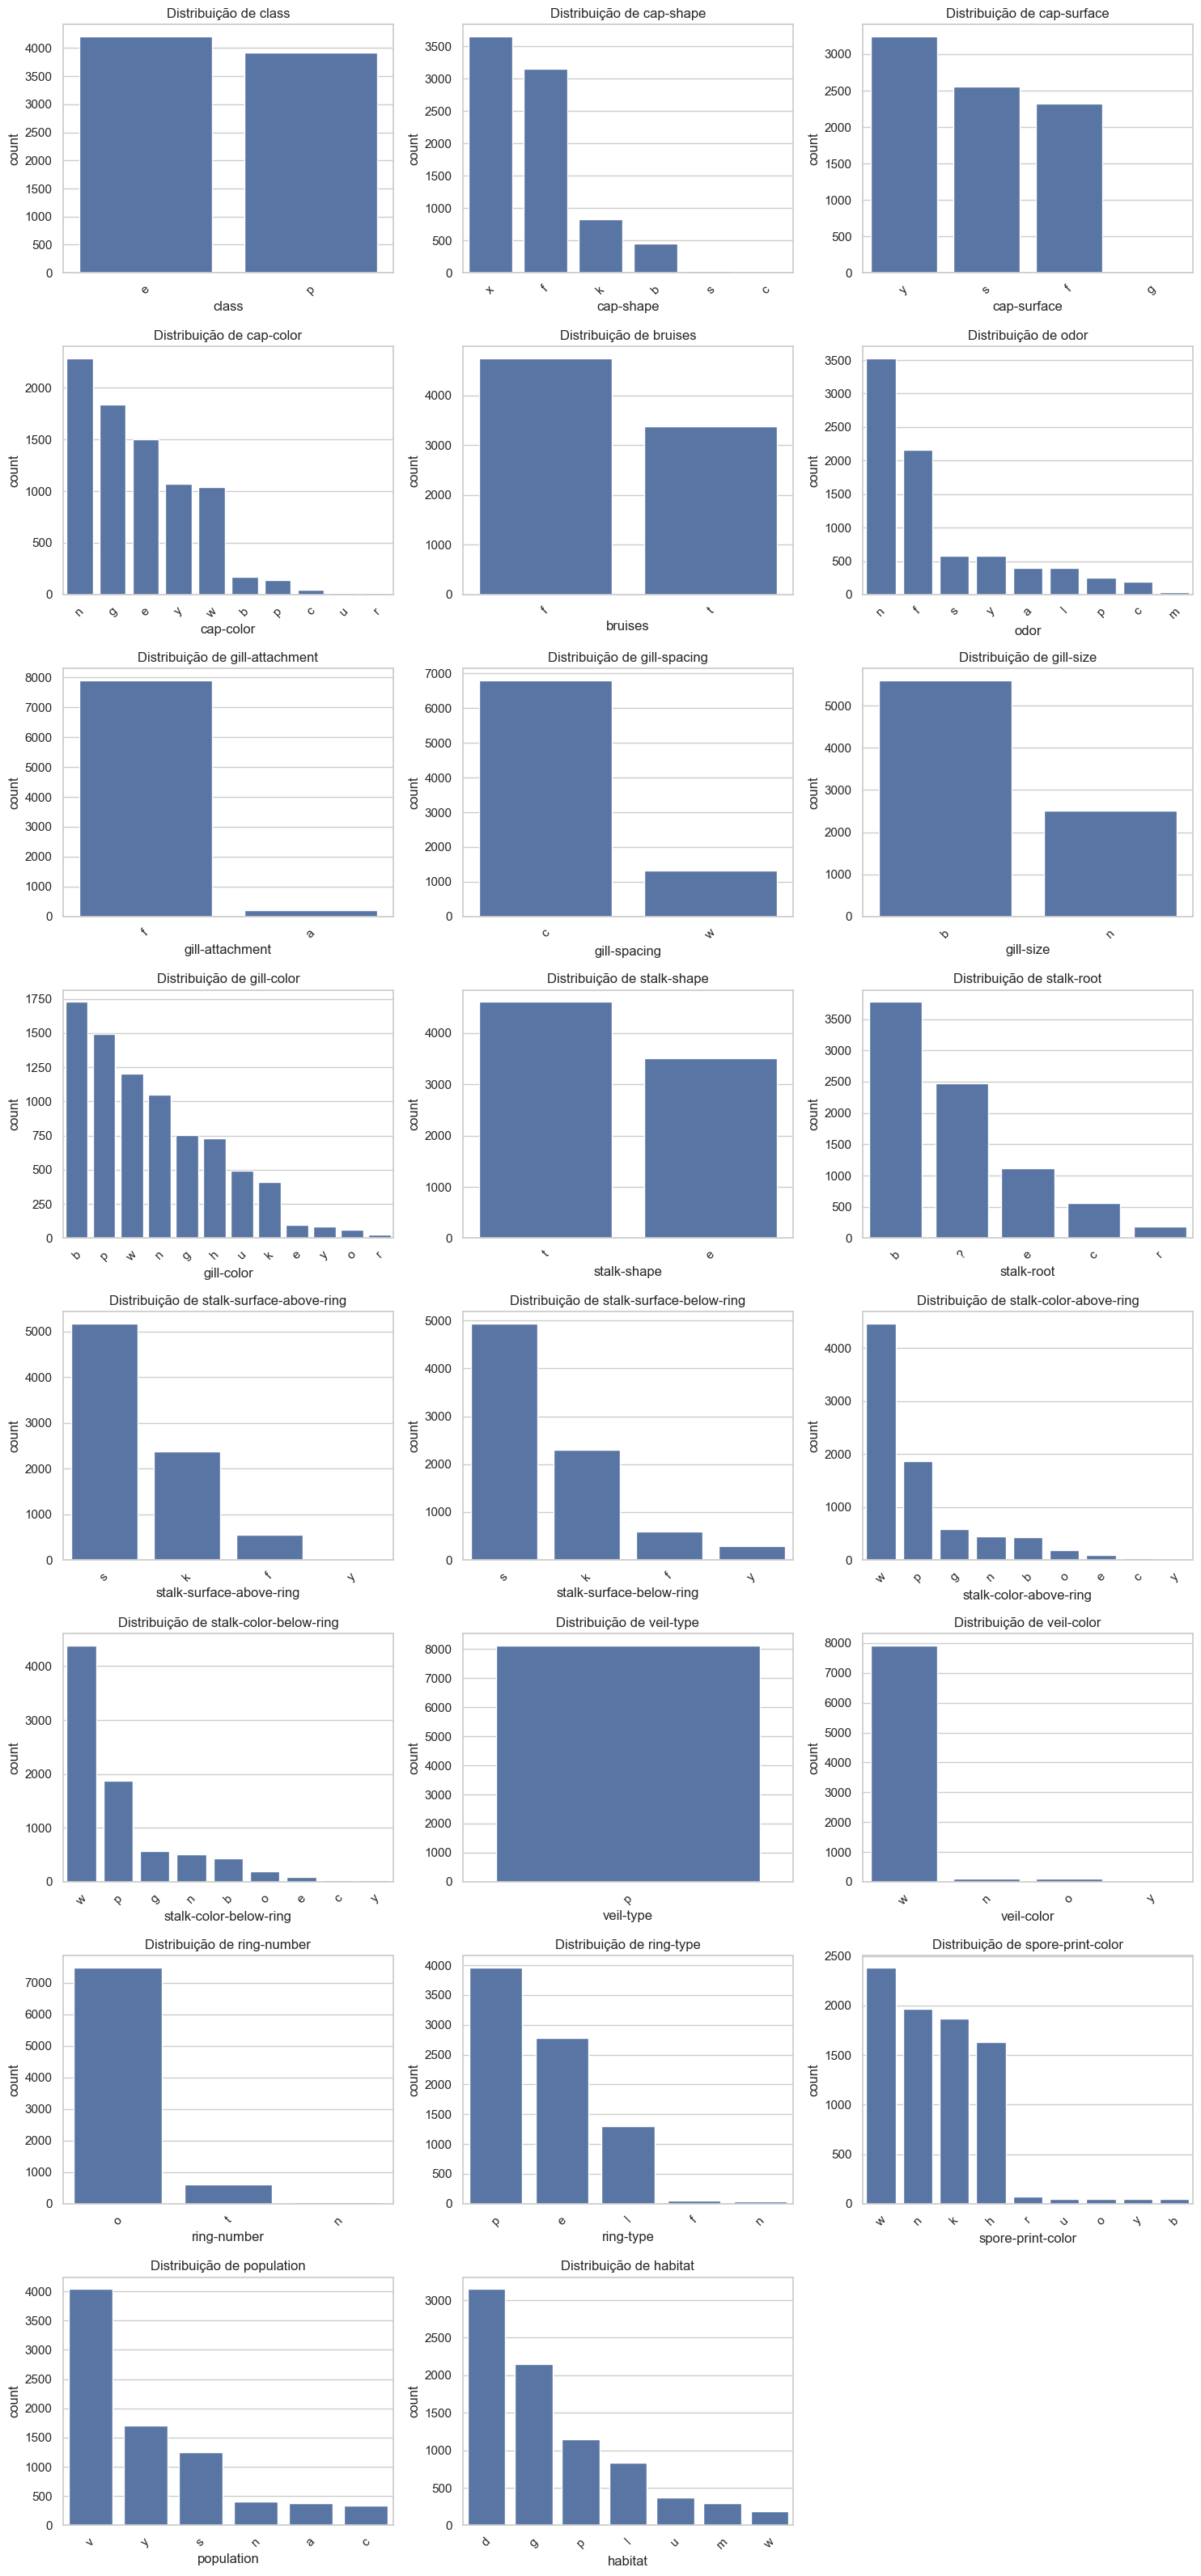

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define um estilo visual
sns.set(style="whitegrid")

# Filtrar apenas colunas categóricas (tipo 'object' ou 'category')
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Tamanho do grid (ajustável conforme o número de colunas)
n_cols = 3
n_rows = -(-len(categorical_cols) // n_cols)  # ceil division

# Criar os subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()  # achata a matriz de eixos

# Plotar cada gráfico
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index)
    axes[i].set_title(f'Distribuição de {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Remover eixos extras se houver
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
